##**Desicion Tree. Clasification problem.**

> Brenda Estefania Castillo fernandez.



> 9°B

> Bloc con sangría



---



In [6]:
import numpy as np
import pandas as pd

path = "/content/kaggle (1).csv"
df = pd.read_csv(path, encoding='latin1')

We start the code by importing the necessary libraries (NumPy and Pandas) and then we load the kaggle dataset (1) that was used, in addition, we use the pd.read_csv function to load the dataset in a DataFrame called df.

In [7]:
valores_faltantes_por_columna = df.isnull().sum()
columnas_con_valores_faltantes = valores_faltantes_por_columna[valores_faltantes_por_columna > 0]

print("Columnas con valores faltantes:")
print(columnas_con_valores_faltantes)

Columnas con valores faltantes:
Formation    111
dtype: int64


Here it was calculated if any column had missing values, and how many it had and stored in valores_faltantes_por_column. Then, the columns with at least one missing value were selected and stored in columnas_con_valores_faltante.

In [8]:
frequent_values = df[['Formation']].mode().iloc[0]
df['Formation'].fillna(frequent_values['Formation'], inplace=True)

columns_string = df.select_dtypes(include=['object']).columns
columns_string

Index(['What Dinosaurs Eat', 'Accepted Name', 'Country', 'Cc', 'Diet',
       'Early Interval', 'Formation', 'Geological Interval',
       'Geological Time Period', 'Ref Author', 'State'],
      dtype='object')

In this part, the missing values of the Formation column were filled in and a list of the columns that had some categorical data was requested.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder_formation = LabelEncoder()
label_encoder_geological_interval = LabelEncoder()
label_encoder_geological_time_period = LabelEncoder()
label_encoder_diet = LabelEncoder()
label_Encoder_country_num = LabelEncoder()
label_encoder_early_interval = LabelEncoder()

df['Geological_Interval'] = label_encoder_geological_interval.fit_transform(df['Geological Interval'])
df['Geological_Time_Period'] = label_encoder_geological_time_period.fit_transform(df['Geological Time Period'])
df['Diet_num'] = label_encoder_diet.fit_transform(df['Diet'])
df['country_num'] = label_Encoder_country_num.fit_transform(df['Country'])
df['Early_Interval'] = label_encoder_early_interval.fit_transform(df['Early Interval'])
df['Diet_num'] = label_encoder_diet.fit_transform(df['Diet'])

In this part a label encoder was used to convert the categorical values to numerical values, this procedure was performed with all the columns to be used in the prediction.


In [10]:
columns_to_drop = ['Cc', 'State', 'Ref Author', 'Ref Pubyr', 'What Dinosaurs Eat', 'Max Ma',	'Min Ma','Formation',
                  'ï»¿Lat',	'Lng',	'Accepted Name',	'Country',	'Diet',	'Early Interval',	'Geological Interval',	'Geological Time Period']
dataset = df.drop(columns=columns_to_drop)

Subsequently, the unnecessary columns and the original columns that were changed in the previous code block were removed.

In [12]:
print(dataset.isnull().sum())

Geological_Interval       0
Geological_Time_Period    0
Diet_num                  0
country_num               0
Early_Interval            0
dtype: int64


In [13]:
dataset

,Geological_Interval,Geological_Time_Period,Diet_num,country_num,Early_Interval
0,27,1,2,1,49
1,4,0,4,1,37
2,4,0,4,1,37
3,8,0,0,0,40
4,8,0,0,0,40
...,...,...,...,...,...
2458,8,0,5,0,17
2459,8,0,5,0,17
2460,8,0,5,0,17
2461,8,0,5,0,17


In [14]:
any(np.isnan(dataset))


True

In [15]:
X = dataset.drop(columns=['Geological_Time_Period'])
y = dataset['Geological_Time_Period']
df = pd.concat([X, y], axis=1)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_dino = DecisionTreeClassifier(random_state=42)
model_dino.fit(X_train, y_train)
prediccion = model_dino.predict(X_test)

y_testn = LabelEncoder().fit_transform(y_test)
precision = accuracy_score(y_testn, prediccion)

print(f'Accuracy: {precision}')

Accuracy: 0.9979716024340771


In this block, the decision tree was trained. Where the train was divided in *80%* and a test in *20%* of the whole dataset, then the model was created using DecisionTreeClassifier. The random_state parameter is set to 42 to ensure reproducibility of the results. After that the .fit is used to train the model, and perform a prediction, then the accuracy of the model is calculated by comparing the actual labels (y_testn) with the predicted labels (prediccion) using the accuracy metric (accuracy_score).

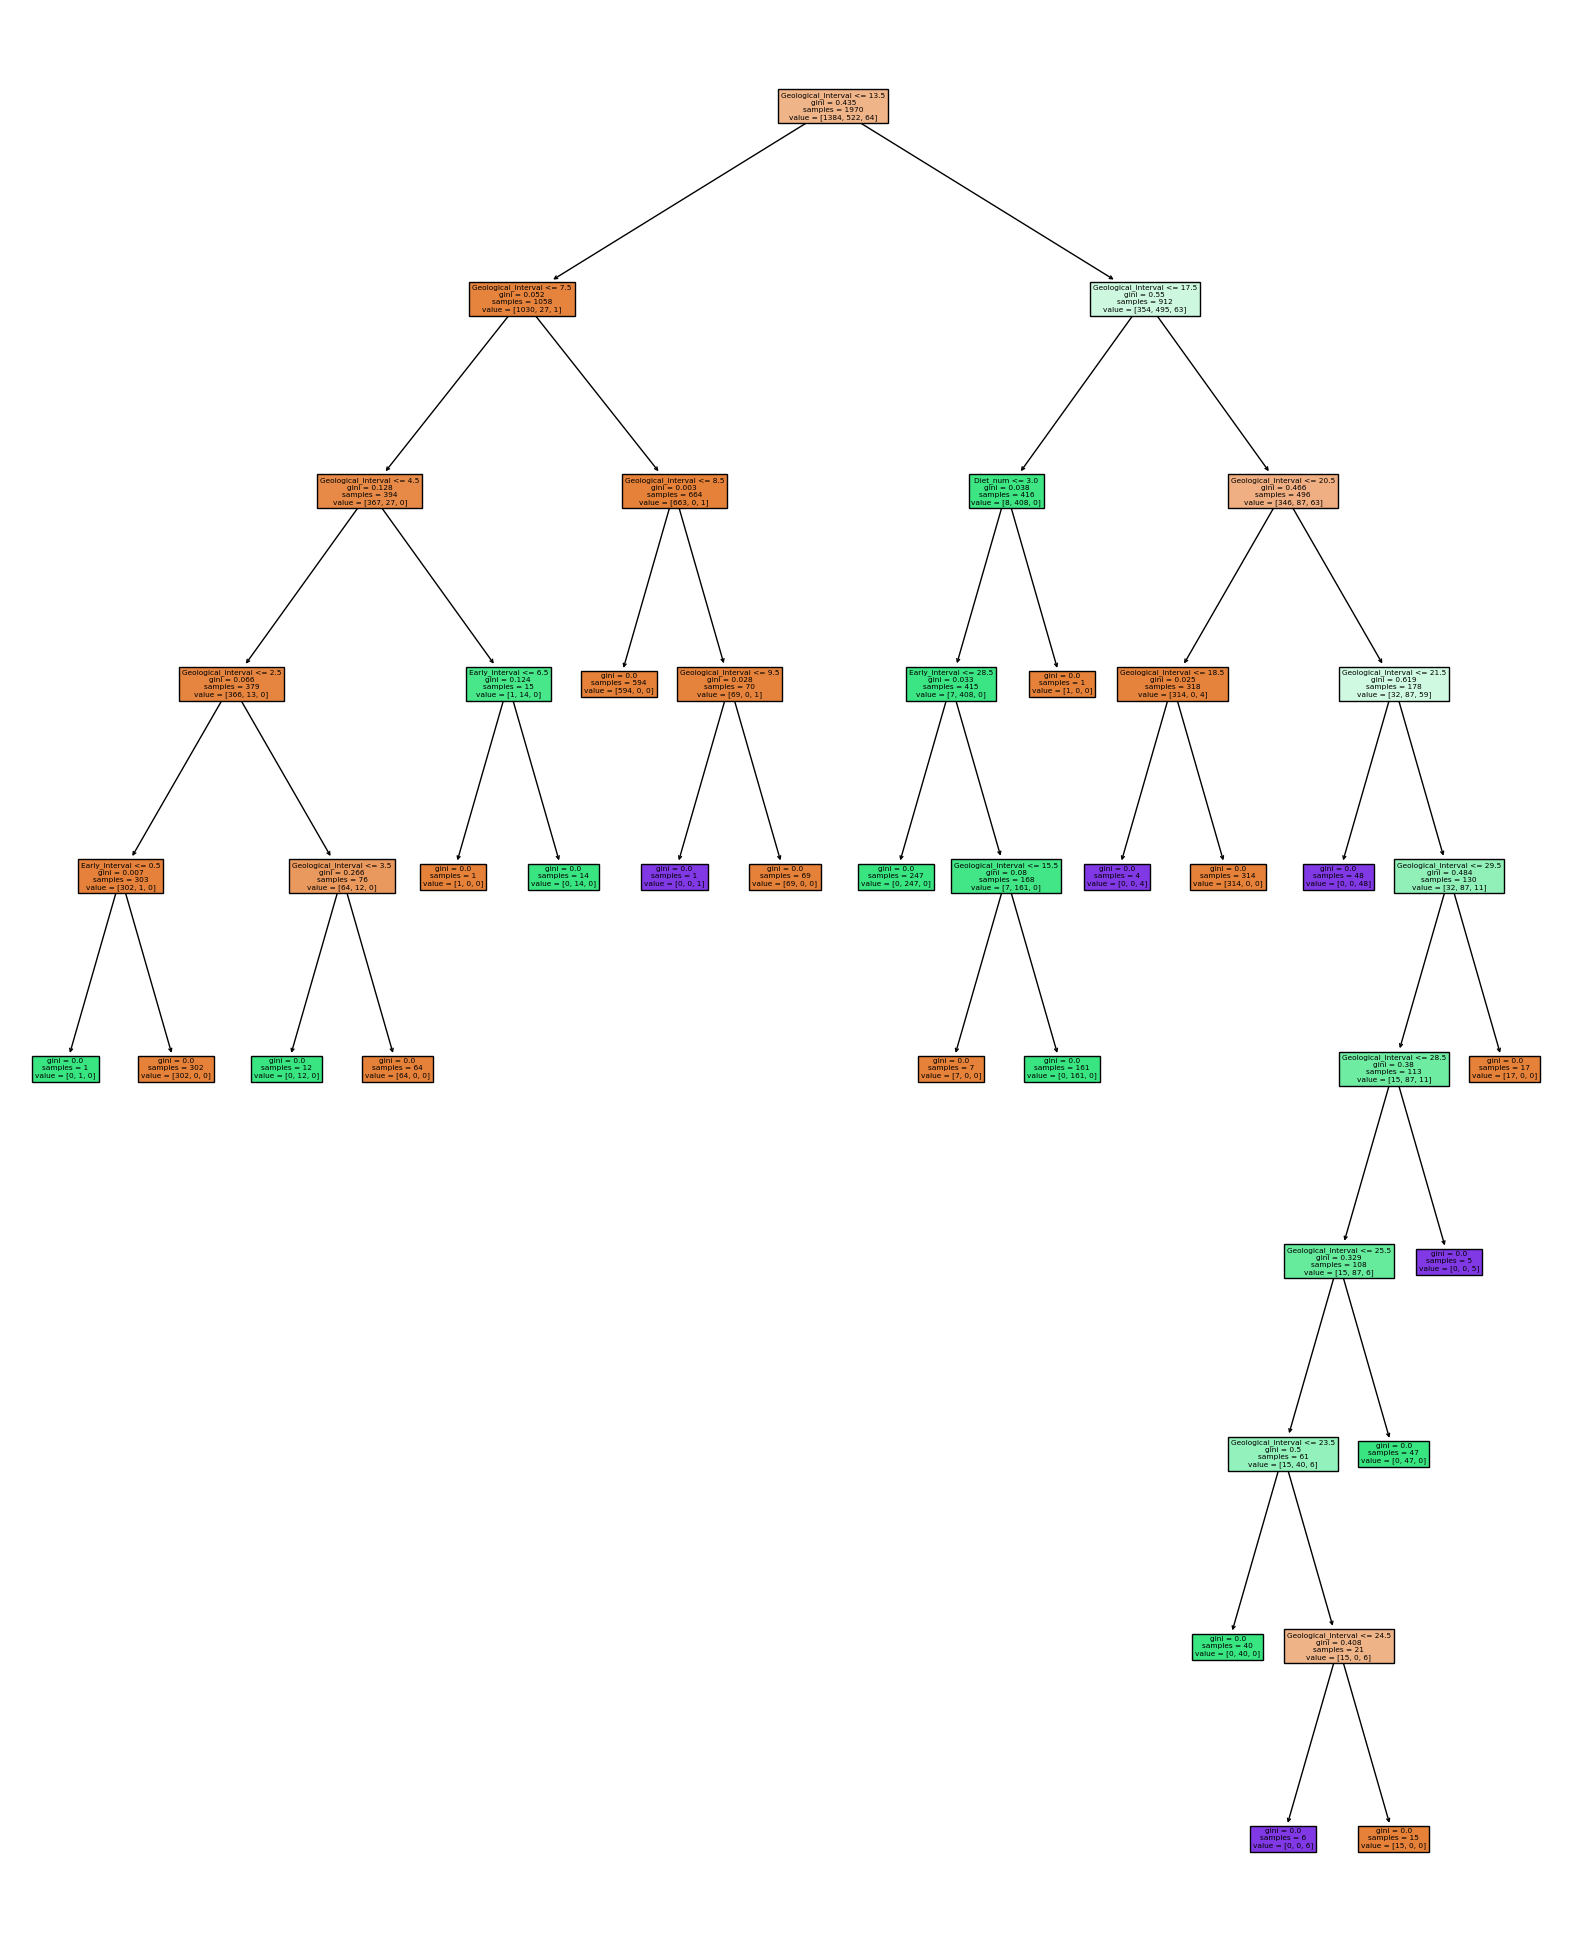

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 25))
plot_tree(model_dino, filled=True, feature_names=X.columns)
plt.savefig("Decision_tree.png", format="png")
plt.show()

In this section only the trained decision tree is plotted, and saved as a png image.
